In [4]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Since you can see the dataset folder in runtime files, it's likely at the root level
DATASET_PATH = '/content/drive/MyDrive/dataset'

# Verify the dataset structure
if os.path.exists(DATASET_PATH):
    print("✅ Dataset found!")

    # List all emoji categories
    emoji_categories = [
        'beaming-face', 'cloud', 'face-spiral', 'flushed-face', 'grimacing-face',
        'grinning-face', 'grinning-squinting', 'heart', 'pouting-face', 'raised-eyebrow',
        'relieved-face', 'savoring-food', 'smiling-heart', 'smiling-horns',
        'smiling-sunglasses', 'smiling-tear', 'smirking-face', 'tears-of-joy'
    ]

    print(f"\n📁 Dataset Structure:")
    print("-" * 60)

    total_images = 0
    for category in emoji_categories:
        category_path = os.path.join(DATASET_PATH, category)
        if os.path.exists(category_path):
            png_files = [f for f in os.listdir(category_path) if f.endswith('.png')]
            count = len(png_files)
            total_images += count
            print(f"{category:20} : {count:3} PNG images")
        else:
            print(f"{category:20} : NOT FOUND")

    print("-" * 60)
    print(f"Total images: {total_images}")
    print(f"Expected: {18 * 30} images")

else:
    print("❌ Dataset not found at /content/dataset")
    print("Let's check alternative paths...")

    # Check alternative paths
    alt_paths = ['/dataset', './dataset', '/content/drive/MyDrive/dataset']
    for path in alt_paths:
        if os.path.exists(path):
            DATASET_PATH = path
            print(f"✅ Found dataset at: {path}")
            break


✅ Dataset found!

📁 Dataset Structure:
------------------------------------------------------------
beaming-face         :  30 PNG images
cloud                :  30 PNG images
face-spiral          :  30 PNG images
flushed-face         :  30 PNG images
grimacing-face       :  30 PNG images
grinning-face        :  30 PNG images
grinning-squinting   :  30 PNG images
heart                :  30 PNG images
pouting-face         :  30 PNG images
raised-eyebrow       :  30 PNG images
relieved-face        :  30 PNG images
savoring-food        :  30 PNG images
smiling-heart        :  30 PNG images
smiling-horns        :  30 PNG images
smiling-sunglasses   :  30 PNG images
smiling-tear         :  30 PNG images
smirking-face        :  30 PNG images
tears-of-joy         :  30 PNG images
------------------------------------------------------------
Total images: 540
Expected: 540 images


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt


IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 16
EPOCHS = 200
DATASET_PATH = '/content/drive/MyDrive/dataset'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")


def create_simple_emoji_cnn(input_shape, num_classes):
    model = Sequential([

        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(256, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])

    return model

model = create_simple_emoji_cnn((IMG_HEIGHT, IMG_WIDTH, 3), num_classes)

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

Found 432 images belonging to 18 classes.
Found 108 images belonging to 18 classes.
Number of classes: 18
Training samples: 432
Validation samples: 108


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,734,994 (10.43 MB)

 Trainable params: 2,734,994 (10.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 454ms/step - accuracy: 0.0423 - loss: 2.9003 - val_accuracy: 0.0625 - val_loss: 2.8883 - learning_rate: 5.0000e-04
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 461ms/step - accuracy: 0.0746 - loss: 2.8878 - val_accuracy: 0.1146 - val_loss: 2.8767 - learning_rate: 5.0000e-04
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 448ms/step - accuracy: 0.0691 - loss: 2.8751 - val_accuracy: 0.2083 - val_loss: 2.7783 - learning_rate: 5.0000e-04
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - accuracy: 0.1236 - loss: 2.7537 - val_accuracy: 0.2292 - val_loss: 2.4385 - learning_rate: 5.0000e-04
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 385ms/step - accuracy: 0.1746 - loss: 2.5692 - val_accuracy: 0.3542 - val_loss: 2.0716 - learning_rate: 5.0000e-04
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 413ms/step - accuracy: 0.2433 - loss: 2.3836 - val_accuracy: 0.4792 - val_loss: 1.7849 - learning_rate: 5.0000e-04
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/ste

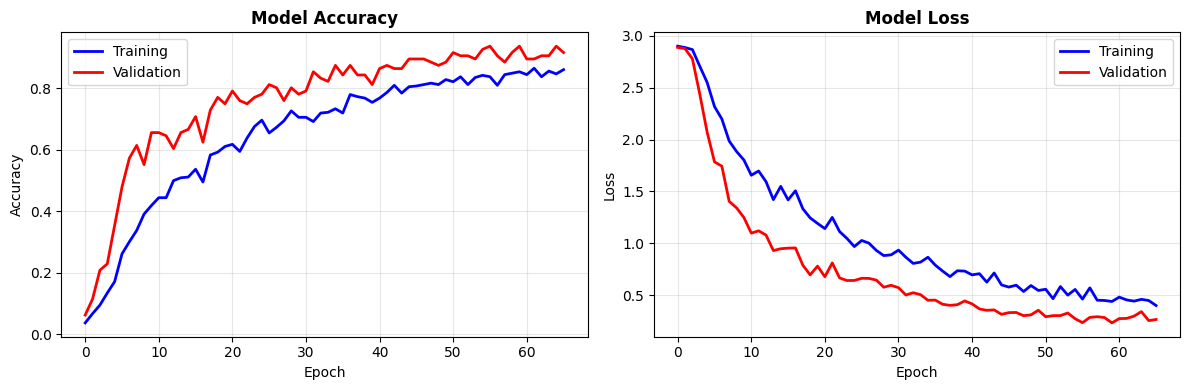

Training Accuracy: 0.861 (86.1%)
Validation Accuracy: 0.917 (91.7%)
Validation Loss: 0.265



Final Validation Accuracy: 0.9352 (93.52%)


In [ ]:
def plot_simple_results(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # accuracy
    ax1.plot(history.history['accuracy'], 'b-', label='Training', linewidth=2)
    ax1.plot(history.history['val_accuracy'], 'r-', label='Validation', linewidth=2)
    ax1.set_title('Model Accuracy', fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Loss
    ax2.plot(history.history['loss'], 'b-', label='Training', linewidth=2)
    ax2.plot(history.history['val_loss'], 'r-', label='Validation', linewidth=2)
    ax2.set_title('Model Loss', fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Final results
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Training Accuracy: {final_train_acc:.3f} ({final_train_acc*100:.1f}%)")
    print(f"Validation Accuracy: {final_val_acc:.3f} ({final_val_acc*100:.1f}%)")
    print(f"Validation Loss: {final_val_loss:.3f}")

plot_simple_results(history)

val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
print(f"\nFinal Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

model.save('simple_emoji_classifier.h5')
